# Cleaning the Data

### Row Headings
"Vehicle Make" = brand, "Violation County" = borough

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#**** CHANGE FILEPATH ACCORDINGLY ****#

csv_filename = "Parking_Violations_Issued_-_Fiscal_Year_2017.csv"
df = pd.read_csv(csv_filename, nrows=5000)


In [3]:

# csv_filename = "Parking_Violations_Issued_-_Fiscal_Year_2017_sample.csv"

# This field holds a list of all the columns that we are exploring
features = ["Plate ID", "Issue Date", "Violation Time", "Issue Datetime", "Vehicle Make", "Vehicle Body Type", "Violation County", "Street Name", "Violation Code", "Violation Description"]

# df = pd.read_csv(csv_filename)
# df = df.sample(3000)

# Clean data of all null issue dates and typos in violation time
def verify_valid_violation_time(entry):
    return len(entry) == 5 and entry[0:4].isdecimal() and int(entry[0:2]) <= 12 and int(entry[2:4]) < 60 and (entry[4] == "P" or entry[4] == "A")
df = df[df["Issue Date"].notnull()]
df = df[df["Violation Time"].notnull()]
df = df[df["Violation Time"].apply(lambda x: verify_valid_violation_time(x))]

# Combine Issue Date and violation time to gather accurate time of each violation
def format_date(date):
    if date[0:2] == "00":
        date = date.replace("00", "12")
    return f"{date[0:2]}:{date[2:]}M"
df["Violation Time"] = df["Violation Time"].apply(lambda x: format_date(x))
df["Issue Datetime"] = pd.to_datetime(df["Issue Date"] + " " + df["Violation Time"])
df["Issue Date"] = pd.to_datetime(df["Issue Date"])

# Remove all null values in the fields we are exploring
for feature in features:
    df = df[df[feature].notnull()]

# Remove Typo"s in Street Name (the csv appears to sometimes have part of the intersecting street leak onto to street name)
# Typo"s fixed by truncating after @ sign
df["Street Name"] = df["Street Name"].apply(lambda x: x.split("@")[0])

# Standardize ways of describing borough names, and remove typos
# Note: R appears to be Staten island bc it"s Richmond County
# After Rename: BX = Bronx, BK = Brooklyn, QN = Queens, MN = Manhattan, ST = Staten Island
boroughs = {"BX": "BX", "BK": "BK", "QN": "QN", "NY": "MN", "Q": "QN", "K": "BK", "ST": "ST", "MN": "MN", "R": "ST", "BRONX": "BX", "QNS": "QN", "KINGS": "BK"}
df["Violation County"] = df["Violation County"].apply(lambda x: boroughs.get(x, None))
df = df[df[feature].notnull()]


# Standardize Formatting of Violation Descriptions
df["Violation Description"] = df["Violation Description"].apply(lambda x: x.upper())
df["Violation Description Includes Code"] = df["Violation Description"].apply(lambda x: x[0].isdecimal())
# df["Violation Description"] = (df["Violation Code"].astype(str) + df["Violation Description"]).where(df["Violation Description Includes Code"])
df["Violation Description"] = np.where(df["Violation Description Includes Code"],
                                       df["Violation Description"],
                                       df["Violation Code"].astype(str) + "-" + df["Violation Description"])
# display("df violation description", df["Violation Description Includes Code"])
# Picking only features we are interested in
df = df[features]
df.dtypes

Plate ID                         object
Issue Date               datetime64[ns]
Violation Time                   object
Issue Datetime           datetime64[ns]
Vehicle Make                     object
Vehicle Body Type                object
Violation County                 object
Street Name                      object
Violation Code                    int64
Violation Description            object
dtype: object

In [4]:
df.sort_values(by="Issue Datetime")

,Plate ID,Issue Date,Violation Time,Issue Datetime,Vehicle Make,Vehicle Body Type,Violation County,Street Name,Violation Code,Violation Description
4349,FPJ9967,2016-07-01,08:07AM,2016-07-01 08:07:00,JEEP,SUBN,MN,E Broadway,21,21-NO PARKING (STREET CLEAN)
4997,065VN,2016-07-01,08:30AM,2016-07-01 08:30:00,NISSA,SUBN,MN,Renwick St,14,14-NO STANDING
3057,HFK6113,2016-07-01,08:36AM,2016-07-01 08:36:00,NISSA,SUBN,QN,27th St,21,21-NO PARKING (STREET CLEAN)
3271,T617946C,2016-07-01,09:47AM,2016-07-01 09:47:00,LINCO,4DSD,BX,EB FORDHAM RD,5,5-BUS LANE VIOLATION
1547,16241TC,2016-07-01,10:29AM,2016-07-01 10:29:00,PETER,TRLR,QN,Roosevelt Ave,38,38-FAILURE TO DISPLAY MUNI REC
...,...,...,...,...,...,...,...,...,...,...
4412,KGD6811,2017-06-27,02:29PM,2017-06-27 14:29:00,MERCU,SUBN,BK,Elm Ave,38,38-FAILURE TO DISPLAY MUNI REC
1956,56133ME,2017-06-27,04:09PM,2017-06-27 16:09:00,FORD,VAN,QN,31st St,38,38-FAILURE TO DISPLAY MUNI REC
2429,HES8134,2017-06-27,04:55PM,2017-06-27 16:55:00,TOYOT,SUBN,BX,Valentine Ave,37,37-EXPIRED MUNI METER
3126,68286MH,2017-06-27,05:09PM,2017-06-27 17:09:00,DODGE,VAN,MN,Pearl St,42,42-EXP. MUNI-MTR (COM. MTR. Z)


In [5]:


# Find number of 
# display(df["Violation County"].value_counts())
# df = df[["Violation County"]]
# df.describe()
df.head()

,Plate ID,Issue Date,Violation Time,Issue Datetime,Vehicle Make,Vehicle Body Type,Violation County,Street Name,Violation Code,Violation Description
0,GZH7067,2016-07-10,01:43AM,2016-07-10 01:43:00,TOYOT,SUBN,BX,ALLERTON AVE (W/B),7,7-FAILURE TO STOP AT RED LIGHT
1,GZH7067,2016-07-08,04:00PM,2016-07-08 16:00:00,TOYOT,SUBN,BX,ALLERTON AVE (W/B),7,7-FAILURE TO STOP AT RED LIGHT
2,FZX9232,2016-08-23,02:33PM,2016-08-23 14:33:00,FORD,SUBN,BX,SB WEBSTER AVE,5,5-BUS LANE VIOLATION
3,66623ME,2017-06-14,11:20AM,2017-06-14 11:20:00,MITSU,REFG,MN,7th Ave,47,47-DOUBLE PKG-MIDTOWN
4,37033JV,2016-11-21,05:55PM,2016-11-21 17:55:00,INTER,DELV,MN,6th Ave,69,69-FAILURE TO DISP MUNI RECPT


In [6]:
# Exploratory Data Analysis
# Five EDA Steps: 
# - Variance/Standard Dev/Mean/Mode/Median/ 
# - Scatter Plot - times of violation
# - line/Bar graph - boroughs where each violation committed
# - pie chart - 1. which Make makes the most violation 2. Whats the common type of Violations
# - Histogram - Months of Violation

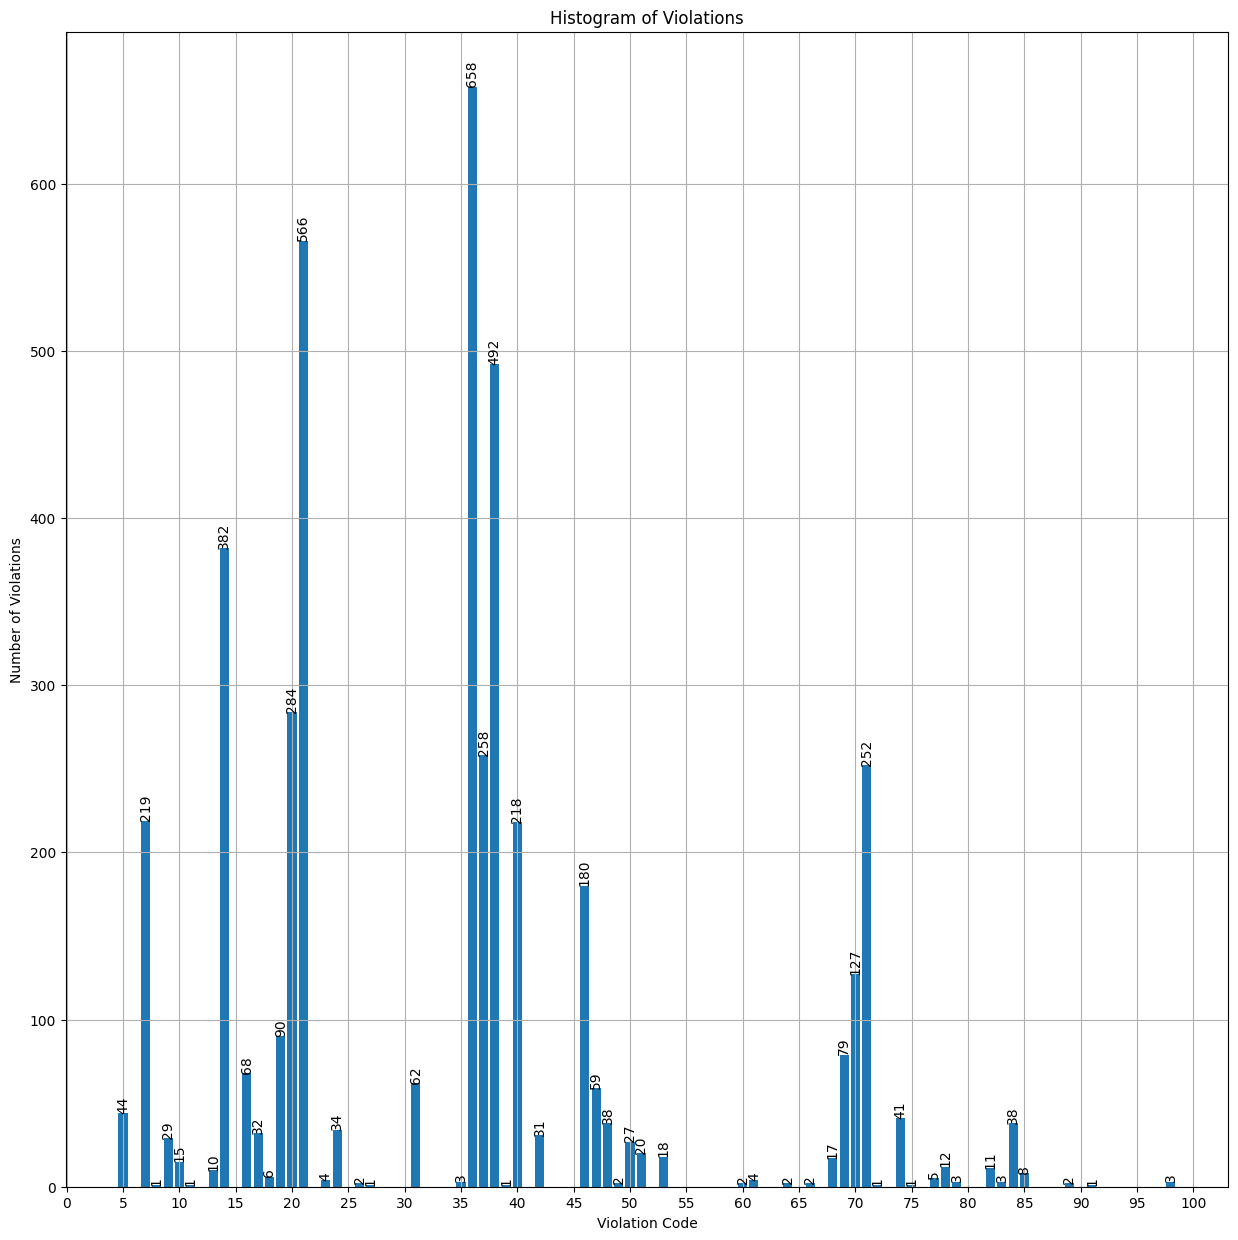

In [7]:
# Bar Graph for Number of Particular Violation Incurred
# plt.figure()
# plt.hist(df["Violation Code"])

# Count the occurrences of each violation code
violation_counts = df["Violation Code"].value_counts().sort_index()

plt.figure(figsize=(15, 15))

bars = plt.bar(violation_counts.index, violation_counts.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, int(height), ha="center", va="bottom", rotation=90)

#plotting
plt.title("Histogram of Violations")
plt.xlabel("Violation Code")
plt.ylabel("Number of Violations")
plt.xticks(range(0, max(violation_counts.index) + 5, 5))
plt.grid(True)
plt.show()

# bar graph to find the most number of common violations in the NY boroughs
# We can see the Violation code 36, 21, and 38 are the most common occuring violations
# Violation Code Description
    # Code 36 - Exceeding the posted speed limit in or near a designated school zone
    # Code 21 - Street Cleaning: No parking where parking is not allowed by sign
    # Code 38 - Parking Metre; Failing to show a receipt or tag in the windshield
# We can infer various things from the violations but to further develop analysis we can split the data with more plots and graphs


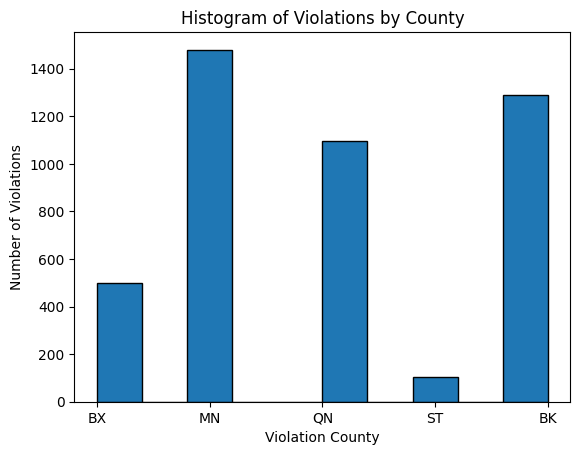

In [8]:
# graph boroughs where each violation committed

#plotting
plt.figure()
plt.hist(df["Violation County"],  edgecolor="black")

plt.title("Histogram of Violations by County")
plt.xlabel("Violation County")
plt.ylabel("Number of Violations")
plt.show()

# We used the Histogram to find the violation occured in all the boroughs.
# We can see Manhattan with the most number of violations.

boroughs ['BX' 'MN' 'QN' 'ST' 'BK']
body_type ['SUBN' 'REFG' 'DELV' 'UT' '4D' 'VAN' '4DSD' 'TK' '2DSD' 'TRAC' 'UTIL'
 'PICK' 'SW' 'CONV' 'WAGO' 'VN' '4 DR' 'SU' 'FLAT' 'BUS' 'MCY' 'TAXI' '4W'
 'SDN' 'TOW' 'TR/C' '4S' 'TRLR' 'MP' 'TR' 'SUV' 'SD' 'APUR' 'MC' 'PK'
 'DUMP' 'SEDN' '2 DR' 'TANK' 'PKUP' 'WAG' 'T/CR' 'MCC' '2CV' 'CP' 'SWT'
 '4WD' 'STAK' 'SEMI' 'COUP' '4DSE' 'WG' 'BOAT' '4C']


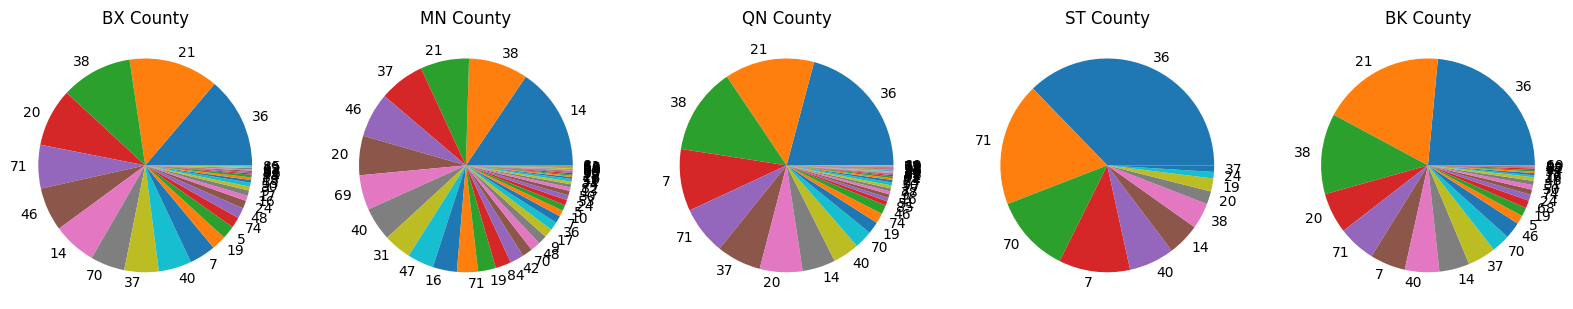

In [10]:
# Pie Charts to find the common violation in every borough


boroughs = df["Violation County"].unique()
print("boroughs", boroughs)


fig, axes = plt.subplots(1, len(boroughs), figsize=(20, 15))

# loop generating multiple charts
for ax, county in zip(axes, boroughs):
    county_data = df[df["Violation County"] == county]

    violation_counts = county_data["Violation Code"].value_counts()
    
    ax.pie(violation_counts, labels=violation_counts.index)
    ax.set_title(f"{county} County")

#plotting
plt.show()

# The bar graphs show all the violations occured in the area county.
# we can see that the most common violation code is 36 and the common one across all borough except Manhattan
# Code 14 - General No Standing: Standing or parking where standing is not allowed by sign
# For Manhattan, we can see that the top 5 violations are space related. 14 being the standing in a no standing zone.
# 38 and 37 being Parking Metre violations, staying there for more time or not displaying the parking ticket
# 21 - Parked during street cleaning and 46 - Standing or parking on the roadway side of a vehicle stopped


body_type ['SUBN' 'REFG' 'DELV' 'UT' '4D' 'VAN' '4DSD' 'TK' '2DSD' 'TRAC' 'UTIL'
 'PICK' 'SW' 'CONV' 'WAGO' 'VN' '4 DR' 'SU' 'FLAT' 'BUS' 'MCY' 'TAXI' '4W'
 'SDN' 'TOW' 'TR/C' '4S' 'TRLR' 'MP' 'TR' 'SUV' 'SD' 'APUR' 'MC' 'PK'
 'DUMP' 'SEDN' '2 DR' 'TANK' 'PKUP' 'WAG' 'T/CR' 'MCC' '2CV' 'CP' 'SWT'
 '4WD' 'STAK' 'SEMI' 'COUP' '4DSE' 'WG' 'BOAT' '4C']


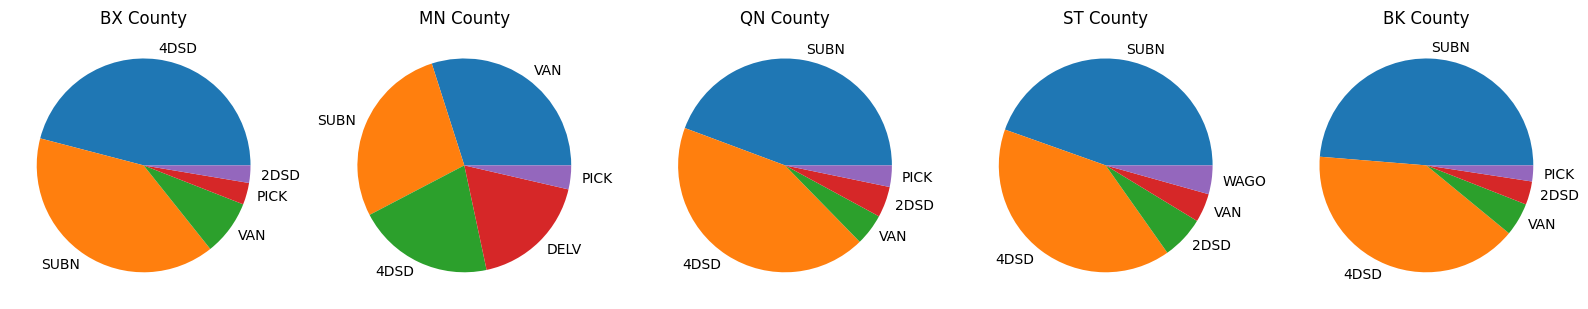

In [13]:
# Pie chart to find the most violation by the Make

boroughs = df["Violation County"].unique()
body_type = df["Vehicle Body Type"].unique()
print("body_type", body_type)


fig1, axes1 = plt.subplots(1, ncols=len(boroughs), figsize=(20, 15))

# loop generating multiple charts
for ax, county in zip(axes1, boroughs):
    county_data = df[df["Violation County"] == county]

    violation_counts = county_data["Vehicle Body Type"].value_counts().head(5)
    
    ax.pie(violation_counts, labels=violation_counts.index)
    ax.set_title(f"{county} County")

#plotting
plt.show()

#https://data.ny.gov/api/assets/83055271-29A6-4ED4-9374-E159F30DB5AE used to find the make names
# based on the above link we can see that for every borough there is a different type. 
# But the most common type is the SUBN, SubUrban type. The graphs shows only the top 5 major vehicle types in their areas with violations.


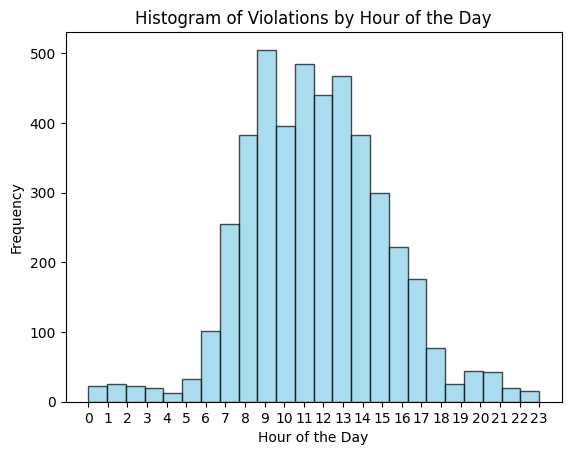

In [14]:
# using histogram for the violation on the time of the day

# creating new tables to change the format of the date time
df["Violation Time"] = pd.to_datetime(df["Violation Time"], format="%I:%M%p")
df["Hour"] = df["Violation Time"].dt.hour

#plotting
plt.figure()
plt.hist(df["Hour"], bins=24, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Violations by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.xticks(range(0, 24))

plt.show()

# This histogram shows the data arranged based on the violation by the hour of the day
# We can see a bell curve in the data distribution where the peek time for any violation ins right around noon
# And there is a slight skew of data during the middle of the night and a dip early morning. 
# This could be for the time during when people are asleep.
# The highest peak indicates that there is a lot of traffic around all the boroughs where multiple violations are happening